<center>
<h1>Supplement S5 of</h1><h2>Categorical Perception of Fear and Anger Expressions<br>in Whole, Masked and Composite Faces.</h2>
</center>

#Cross-Validating

- logistic functions are fitted to the raw data of each participant
- fit of both functions as measured by sums of squared errors between raw and fitted data are computed
- the data are cross-validated by splitting them within each participant and using either raw or fitted data to predict the left-out half of the experiment

## Import Libraries

In [1]:
import fnmatch # filename matching
import os # navigating directories

import numpy as np

from scipy import stats
from scipy.optimize import curve_fit

import pandas as pd
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 1000)

import seaborn as sns

%pylab inline
plt.rcParams['lines.linewidth'] = 5 # default line width for figures

Populating the interactive namespace from numpy and matplotlib


## Get List of previously saved df's (pickle)

For generation of the logistic data please refer to S4

In [2]:
def get_list(where, what):
    #os.chdir(where)
    fileList = []
    for fileName in os.listdir(where):
        if fnmatch.fnmatch(fileName, what):
            fileList.append(where+fileName)
    return fileList

In [3]:
fileList = get_list('./data/','*Pt*.txt')
fileList.sort()
for i in range(len(fileList)):
    print i,':\t',fileList[i]

0 :	./data/Exp1Pt1MainResults.txt
1 :	./data/Exp1Pt1ResultsAll.txt
2 :	./data/Exp1Pt2MainResults.txt
3 :	./data/Exp1Pt2ResultsAll.txt
4 :	./data/Exp2Pt1Results.txt
5 :	./data/Exp2Pt1ResultsAll.txt
6 :	./data/Exp2Pt2Results.txt
7 :	./data/Exp2Pt2ResultsAll.txt
8 :	./data/exp1Pt1Logistic.txt
9 :	./data/exp1Pt2Logistic.txt
10 :	./data/exp2Pt1Logistic.txt
11 :	./data/exp2Pt2Logistic.txt


## Load df's 

In [5]:
def load_this(csv):
    df = pd.read_csv(csv,
                     index_col=[0],
                     header=[0,1])
    return df

# Experiment 1

In [6]:
exp1RawPt1 = load_this(fileList[0])/100
exp1RawPt2 = load_this(fileList[2])/100
exp1LogPt1 = load_this(fileList[8])
exp1LogPt2 = load_this(fileList[9])

Example:

In [7]:
exp1RawPt1

whole                                                             mouth  \
grade   m00   m01   m02   m03   m04   m05   m06   m07   m08   m09   m10   m00   
p                                                                               
p001   0.10  0.15  0.25  0.25  0.35  0.60  0.65  0.90  1.00  1.00  1.00  0.20   
p002   0.20  0.00  0.05  0.20  0.20  0.30  0.60  0.70  0.85  0.95  1.00  0.25   
p003   0.15  0.10  0.05  0.20  0.35  0.75  0.75  1.00  1.00  1.00  1.00  0.15   
p004   0.00  0.05  0.25  0.10  0.35  0.25  0.55  0.70  0.90  0.80  0.85  0.15   
p005   0.00  0.00  0.05  0.20  0.15  0.20  0.40  0.60  0.90  0.85  0.80  0.20   
p006   0.05  0.10  0.05  0.10  0.20  0.55  0.75  1.00  0.95  1.00  1.00  0.20   
p007   0.20  0.05  0.15  0.20  0.10  0.40  0.70  0.75  0.90  1.00  0.95  0.35   
p008   0.15  0.20  0.15  0.25  0.35  0.60  0.50  0.80  0.95  0.95  1.00  0.55   
p009   0.05  0.00  0.00  0.00  0.25  0.35  0.50  0.70  0.95  0.95  1.00  0.10   
p010   0.05  0.10  0.20  0.20  0.20  0.60  0.65  0.90  0.95  0.95  1.00  0.35   
p011   0.05  0.10  0.10  0.05  0.15  0.35  0.70  0.85  0.85  0.90  1.00  0.35   
p012   0.05  0.10  0.30  0.40  0.60  0.70  0.85  1.00  0.95  1.00  0.95  0.30   
p013   0.05  0.05  0.05  0.10  0.20  0.25  0.70  0.75  0.95  0.95  0.95  0.30   
p014   0.05  0.00  0.15  0.10  0.20  0.50  0.50  0.85  1.00  1.00  1.00  0.10   
p015   0.05  0.00  0.15  0.20  0.25  0.40  0.70  0.75  1.00  0.95  1.00  0.20   
p016   0.10  0.10  0.10  0.15  0.30  0.40  0.60  0.80  0.85  1.00  1.00  0.30   
p019   0.00  0.05  0.15  0.05  0.15  0.50  0.75  0.95  1.00  1.00  1.00  0.30   
p020   0.20  0.15  0.25  0.25  0.30  0.60  0.70  0.65  0.90  0.95  0.85  0.20   
p021   0.00  0.00  0.05  0.10  0.20  0.30  0.40  0.75  0.80  0.95  1.00  0.25   
p022   0.00  0.00  0.10  0.20  0.25  0.45  0.50  0.65  1.00  1.00  1.00  0.20   
p023   0.10  0.05  0.15  0.25  0.40  0.60  0.90  0.90  1.00  1.00  1.00  0.25   
p024   0.10  0.20  0.15  0.25  0.25  0.50  0.85  0.90  1.00  0.95  1.00  0.05   
p025   0.20  0.15  0.20  0.20  0.50  0.50  0.65  0.65  0.65  0.90  0.90  0.50   
p026   0.05  0.15  0.00  0.05  0.25  0.55  0.70  0.90  1.00  1.00  1.00  0.20   
p027   0.00  0.20  0.20  0.30  0.45  0.50  0.80  0.90  0.90  1.00  1.00  0.20   
p028   0.10  0.00  0.00  0.20  0.20  0.30  0.55  0.80  0.80  0.95  1.00  0.25   
p029   0.00  0.00  0.00  0.05  0.15  0.20  0.65  0.60  0.70  0.85  0.90  0.20   
p030   0.45  0.60  0.45  0.55  0.40  0.60  0.85  0.80  1.00  0.90  1.00  0.65   

                                                                   eyes        \
grade   m01   m02   m03   m04   m05   m06   m07   m08   m09   m10   m00   m01   
p                                                                               
p001   0.40  0.35  0.40  0.45  0.50  0.80  0.75  0.85  0.70  0.75  0.15  0.00   
p002   0.25  0.35  0.35  0.40  0.60  0.80  0.75  0.85  0.75  0.90  0.15  0.25   
p003   0.30  0.35  0.50  0.50  0.45  0.70  0.55  0.55  0.75  0.80  0.30  0.25   
p004   0.25  0.35  0.25  0.25  0.40  0.50  0.45  0.65  0.45  0.60  0.30  0.25   
p005   0.20  0.35  0.35  0.45  0.40  0.50  0.45  0.65  0.70  0.55  0.00  0.00   
p006   0.15  0.30  0.45  0.45  0.55  0.70  0.70  0.70  0.90  0.90  0.05  0.05   
p007   0.50  0.55  0.55  0.60  0.65  0.70  0.90  1.00  0.85  0.95  0.10  0.10   
p008   0.70  0.60  0.65  0.70  0.75  0.75  0.95  0.90  0.95  0.90  0.15  0.15   
p009   0.10  0.35  0.15  0.25  0.60  0.65  0.75  0.80  0.75  0.80  0.05  0.00   
p010   0.30  0.35  0.40  0.45  0.65  0.70  0.65  0.60  0.65  0.80  0.10  0.35   
p011   0.30  0.35  0.50  0.55  0.65  0.75  0.95  1.00  0.85  0.95  0.00  0.00   
p012   0.45  0.40  0.55  0.60  0.65  0.95  0.85  0.90  0.90  0.85  0.40  0.25   
p013   0.35  0.40  0.45  0.55  0.60  0.70  0.85  0.90  0.80  0.70  0.00  0.15   
p014   0.00  0.25  0.15  0.25  0.25  0.55  0.75  0.80  0.80  0.80  0.05  0.05   
p015   0.25  0.30  0.40  0.40  0.40  0.50  0.45  0.60  0.50  0.55  0.20  0.05   
p016   0.45  0.45  0.50  0.50  0.75 

In [8]:
exp1LogPt1

eyes                                                              \
           m00       m01       m02       m03       m04       m05       m06   
p001  0.035055  0.063374  0.111919  0.190101  0.304191  0.448808  0.602633   
p002  0.175276  0.203768  0.259525  0.355992  0.492049  0.637449  0.753258   
p003  0.343028  0.388075  0.448351  0.523192  0.607949  0.694488  0.773986   
p004  0.283069  0.303089  0.333588  0.377854  0.437790  0.511739  0.593187   
p005  0.035731  0.061532  0.103728  0.169026  0.261911  0.379350  0.507560   
p006  0.060782  0.075761  0.110218  0.184077  0.320941  0.517470  0.716612   
p007  0.106250  0.115227  0.136540  0.184660  0.281975  0.441272  0.629488   
p008  0.165266  0.180653  0.210426  0.265056  0.356181  0.486437  0.636768   
p009  0.009248  0.021439  0.048863  0.107313  0.218713  0.391966  0.591460   
p010  0.137865  0.161995  0.199494  0.254914  0.331024  0.425650  0.529760   
p011  0.002133  0.005693  0.015104  0.039451  0.099096  0.227556  0.441022   
p012  0.273775  0.291150  0.319910  0.365254  0.431536  0.518437  0.617455   
p013  0.030283  0.056857  0.104111  0.182607  0.299343  0.447216  0.600697   
p014  0.068740  0.089090  0.129647  0.205120  0.329169  0.496676  0.671563   
p015  0.091814  0.119666  0.163466  0.228505  0.317296  0.425550  0.540725   
p016  0.063661  0.079108  0.110824  0.172249  0.278791  0.432520  0.604248   
p019  0.054149  0.062302  0.085871  0.149789  0.296845  0.536585  0.770562   
p020  0.264495  0.283054  0.322660  0.398313  0.516391  0.652968  0.765474   
p021  0.005288  0.011072  0.023011  0.047101  0.093557  0.175799  0.301520   
p022  0.066963  0.083538  0.115180  0.172676  0.268375  0.406553  0.570019   
p023  0.169179  0.188836  0.226779  0.295159  0.404401  0.549283  0.700423   
p024  0.157112  0.166616  0.188208  0.234820  0.325219  0.468991  0.638495   
p025  0.160975  0.172769  0.196444  0.241633  0.320156  0.436668  0.574548   
p026  0.224978  0.246677  0.285015  0.348205  0.441320  0.558123  0.678302   
p027  0.281646  0.308716  0.355537  0.429976  0.533797  0.654960  0.770139   
p028  0.006887  0.015983  0.036601  0.081365  0.170092  0.317991  0.505438   
p029  0.006761  0.015033  0.033053  0.070940  0.144995  0.271079  0.442537   
p030  0.395626  0.420462  0.456228  0.504839  0.565966  0.635736  0.707087   

                                                 mouth                      \
           m07       m08       m09       m10       m00       m01       m02   
p001  0.738538  0.840281  0.907397  0.948053  0.256650  0.292185  0.344578   
p002  0.825765  0.864550  0.883565  0.892487  0.261547  0.275511  0.304911   
p003  0.840233  0.891098  0.927752  0.952974  0.259357  0.298603  0.346806   
p004  0.672406  0.740667  0.793611  0.831422  0.200407  0.222889  0.253099   
p005  0.626925  0.722669  0.790696  0.834975  0.246170  0.268032  0.298012   
p006  0.858453  0.936105  0.972601  0.988521  0.206153  0.241654  0.294911   
p007  0.782289  0.872857  0.916890  0.936236  0.412489  0.444903  0.490122   
p008  0.772809  0.871364  0.931844  0.965258  0.575570  0.592934  0.619890   
p009  0.755098  0.855930  0.907531  0.931441  0.105569  0.115622  0.142708   
p010  0.629967  0.714744  0.778982  0.823710  0.336336  0.357206  0.387793   
p011  0.678771  0.849831  0.938105  0.975957  0.320902  0.341680  0.380660   
p012  0.713749  0.793997  0.852706  0.891689  0.343323  0.378773  0.436695   
p013  0.730338  0.822108  0.879253  0.912043  0.331388  0.355551  0.395199   
p014  0.811349  0.901106  0.950912  0.976331  0.015329  0.032865  0.068704   
p015  0.646792  0.732250  0.793989  0.835165  0.250747  0.273731  0.304022   
p016  0.748941  0.844597  0.898122  0.925311  0.344825  0.376883  0.427054   
p019  0.908595  0.967349  0.988828  0.996235  0.308045  0.317215  0.336288   
p020  0.835006  0.870646  0.887171  0.894476  0.266139  0.281907  0.299829   
p021  0.456300  0.603158  0.711824  0.778336  0.288341  0.311823  0.347198   
p022  0.723389  0.838992  0.912

# Compute Fit of Functions to Raw Data by Sums of Squared Errors

## Compute Sum of Squared Errors

In [9]:
def getSqrdErrors(fit1,fit2,raw1,raw2,cond,thisName):
    firstDf = (fit1[cond]-raw2[cond])**2
    scndDf = (fit2[cond]-raw1[cond])**2
    
    allSums = {}
    for p in firstDf.index:
        allSums[p] = [firstDf.ix[p].sum()]
    
    for p in scndDf.index:
         allSums[p].append(scndDf.ix[p].sum())
    
    meanSums = {}
    for p in allSums:
        meanSums[p] = mean(allSums[p])
    
    meanDf = pd.DataFrame(meanSums,index=[thisName]).T
    meanDf.index = [[cond]*len(meanDf), meanDf.index]
    return meanDf

In [10]:
def allSqrdConds(fit1,fit2,raw1,raw2,thisName):
    assert raw1.columns.levels[0].all() == raw2.columns.levels[0].all() == fit1.columns.levels[0].all() == fit2.columns.levels[0].all(),"comparing wrong df's!"
    for cond in raw1.columns.levels[0]:
        thisDf = getSqrdErrors(fit1,fit2,raw1,raw2,cond,thisName)
        try:
            bigDf = pd.concat([bigDf,thisDf],axis=0)
        except:
            bigDf = thisDf
    return bigDf

In [11]:
def allSqrdFits(fit1,fit2,raw1,raw2):
    dfRaw = allSqrdConds(raw1,raw2,raw1,raw2,'raw').unstack(0)
    dfLog = allSqrdConds(fit1,fit2,raw1,raw2,'log').unstack(0)
    dfAll = pd.concat([dfRaw,dfLog],axis=1)
    return dfAll

In [12]:
exp1CvFits = allSqrdFits(exp1LogPt1,exp1LogPt2,exp1RawPt1,exp1RawPt2)

In [13]:
exp1CvFits

raw                       log                    
        eyes   mouth   whole      eyes     mouth     whole
p001  0.1875  0.3450  0.0525  0.149333  0.265627  0.064312
p002  0.1025  0.0875  0.0625  0.042005  0.072233  0.043708
p003  0.2325  0.2325  0.1425  0.137744  0.176726  0.087216
p004  0.2650  0.2200  0.1150  0.125638  0.127602  0.102354
p005  0.1650  0.1875  0.0975  0.088643  0.208577  0.065074
p006  0.1025  0.1600  0.0625  0.096943  0.132299  0.047785
p007  0.0625  0.1050  0.1300  0.047719  0.089317  0.071827
p008  0.0525  0.0650  0.2000  0.055936  0.033602  0.161427
p009  0.0925  0.1900  0.1175  0.060067  0.129095  0.091930
p010  0.4150  0.2675  0.1975  0.332058  0.171006  0.198118
p011  0.1575  0.0850  0.0900  0.153384  0.054574  0.086016
p012  0.1900  0.1325  0.1025  0.129551  0.083025  0.080577
p013  0.0375  0.1200  0.0525  0.052056  0.073280  0.054525
p014  0.0375  0.0800  0.0850  0.026090  0.112619  0.042682
p015  0.1050  0.1225  0.1050  0.091338  0.053448  0.047318
p016  0.0575  0.1425  0.0500  0.070338  0.135383  0.037818
p019  0.0825  0.0875  0.0550  0.053206  0.079611  0.038567
p020  0.2650  0.1475  0.2450  0.121693  0.083308  0.197509
p021  0.0800  0.1775  0.0400  0.084117  0.193834  0.019602
p022  0.1525  0.1200  0.1600  0.083365  0.059233  0.111726
p023  0.2225  0.2575  0.1550  0.176299  0.242828  0.137028
p024  0.1325  1.3925  0.0425  0.097887  1.418230  0.018808
p025  0.0775  0.1725  0.1200  0.078258  0.105389  0.069021
p026  0.1150  0.0900  0.0675  0.072086  0.064482  0.039078
p027  0.0550  0.0975  0.1025  0.045581  0.077883  0.090140
p028  0.0550  0.1650  0.0850  0.054809  0.075891  0.041974
p029  0.2050  0.1750  0.1600  0.150490  0.114681  0.135082
p030  0.0825  0.3100  0.2950  0.052315  0.212242  0.210392

###violin plots and t-tests

In [14]:
def ssStats(fitDf):
    
    # get differences between logistic and raw fit
    diffDf = fitDf['log']-fitDf['raw']
    
    # plot results
    sns.violinplot(diffDf)
    axhline(0,linewidth=1,color='k')
    sns.despine()
    show()
    
    # inf statistics
    for cond in diffDf.columns:
        t2,p2 = stats.ttest_rel(fitDf['log'][cond],fitDf['raw'][cond])
        t,p = stats.ttest_1samp(diffDf[cond],0)
        assert t2 == t and p2 == p
        w,wp = stats.wilcoxon(fitDf['log'][cond],fitDf['raw'][cond])
        print "--------",cond,"--------"
        print "ttest: t:",t,"\tp:",p
        print "wilco: w:",w, "\tp:",wp
        if p < 0.001 and wp <0.001:
            print "***"
        
    # return df for further use
    return diffDf

/opt/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


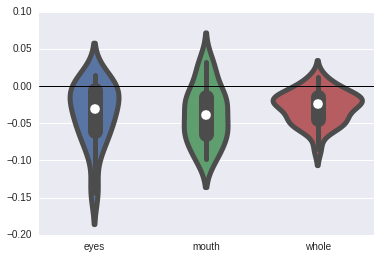

-------- eyes --------
ttest: t: -4.78342872047 	p: 5.45108696806e-05
wilco: w: 30.0 	p: 8.16664930892e-05
***
-------- mouth --------
ttest: t: -5.45511993651 	p: 8.98960590749e-06
wilco: w: 38.0 	p: 0.000171766929212
***
-------- whole --------
ttest: t: -6.91581738085 	p: 1.97164403455e-07
wilco: w: 7.0 	p: 8.0745002878e-06
***


In [15]:
exp1CvFitsDiff = ssStats(exp1CvFits)

In [16]:
exp1CvFitsDiff

,eyes,mouth,whole
p001,-0.038167,-0.079373,0.011812
p002,-0.060495,-0.015267,-0.018792
p003,-0.094756,-0.055774,-0.055284
p004,-0.139362,-0.092398,-0.012646
p005,-0.076357,0.021077,-0.032426
p006,-0.005557,-0.027701,-0.014715
p007,-0.014781,-0.015683,-0.058173
p008,0.003436,-0.031398,-0.038573
p009,-0.032433,-0.060905,-0.025570
p010,-0.082942,-0.096494,0.000618


In [17]:
exp1CvFitsDiff.describe()

,eyes,mouth,whole
count,28.000000,28.000000,28.000000
mean,-0.037805,-0.038892,-0.028514
std,0.041821,0.037725,0.021817
min,-0.143307,-0.097758,-0.084608
25%,-0.060460,-0.064921,-0.044142
50%,-0.031309,-0.039059,-0.024305
75%,-0.005197,-0.015118,-0.014198
max,0.014556,0.032619,0.011812


##Experiment 2

In [18]:
exp2RawPt1 = load_this(fileList[4])/100
exp2RawPt2 = load_this(fileList[6])/100
exp2LogPt1 = load_this(fileList[10])
exp2LogPt2 = load_this(fileList[11])

In [19]:
exp2CvFits = allSqrdFits(exp2LogPt1,exp2LogPt2,exp2RawPt1,exp2RawPt2)

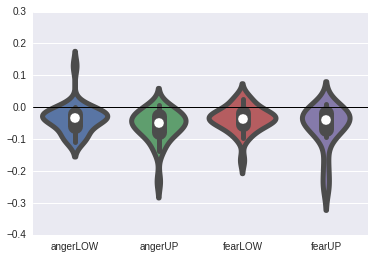

-------- angerLOW --------
ttest: t: -4.42642526837 	p: 0.00013274117853
wilco: w: 30.0 	p: 5.02738502025e-05
***
-------- angerUP --------
ttest: t: -6.38010736219 	p: 6.62192971512e-07
wilco: w: 3.0 	p: 3.51496308127e-06
***
-------- fearLOW --------
ttest: t: -5.0491342719 	p: 2.42470626709e-05
wilco: w: 30.0 	p: 5.02738502025e-05
***
-------- fearUP --------
ttest: t: -4.96182137503 	p: 3.07851727196e-05
wilco: w: 2.0 	p: 3.16517001863e-06
***


,angerLOW,angerUP,fearLOW,fearUP
p001,-0.084272,-0.030249,-0.070008,-0.059798
p002,-0.102911,-0.105584,-0.167147,-0.029719
p003,-0.022267,-0.100270,-0.024158,-0.012700
p004,-0.049678,-0.000708,-0.051475,-0.199237
p005,-0.029045,-0.026242,0.010404,-0.043107
p006,-0.028620,-0.030973,-0.036631,-0.011539
p007,-0.032632,-0.049288,-0.026426,-0.091691
p008,-0.064121,-0.078360,-0.042827,-0.082052
p009,-0.084836,-0.135693,0.017191,-0.065153
p010,-0.004575,-0.233808,-0.053123,-0.037701


In [20]:
ssStats(exp2CvFits)

# Cross-Predicting Conditions with Raw Data

## Split-Half within Subject (pt1 vs. pt2)

In [21]:
def logistic(x,a,b):
    y = 1 / (1 + np.exp(-b*(x-a)))
    return y

In [22]:
def fit_func(func,ydata):
    # for all designs in this study, there are 11 morphing steps, scaled between 0 and 1
    x = arange(0,len(ydata)/10.,0.1)
    # the scipy curvefit function is used here
    popt, pcov = curve_fit(func, x, ydata, maxfev=100000)

    intercept = popt[0] # intercept
    slope = popt[1]     # slope
    y = func(x, intercept,slope) # the y-data of the fitted function

    return x,y,intercept,slope

In [23]:
def get_cv_ss2(func,ytrain,ytest):
    ''' a certain function (linear or logisitic) is fitted to some training data ytrain. 
    Then the y-values of the fitted function are compared to a left-out dataset ytest
    by a simple sum-of-squares method. Thereby, the fit of the function to new data is
    computed. '''
    
    # instead of fitting a function we might also just compare two raw data sets
    if func == 'raw':
        ss2 = sum(square(ytest-ytrain))
        
    # fitting a function
    else:
        x,y,intercept,slope = fit_func(func,ytrain)
        ss2 = sum( square(ytest-y) )
        
    return ss2

## CV with raw data between different conditions

Get ss2 for a certain pairing of conditions:

In [24]:
def cond_cv_ss2(func,train_df,test_df,train_cond,test_cond):
    assert train_df.index.all() == test_df.index.all(), "comparing incompatible tables!"
    cases = train_df.index
    
    ss2 = []
    for entry in cases:
        ytrain = np.array( train_df.ix[entry][train_cond] )
        ytest = np.array( test_df.ix[entry][test_cond] )
        ss2.append( get_cv_ss2(func,ytrain,ytest) )

    return ss2

Get ss2 for all pairings of conditions:

In [25]:
def cond_cv_table(test_df,train_df,func):
    d = {}
    for c1 in ['whole','eyes','mouth']:
        for c2 in ['whole','eyes','mouth']:
            d[str(c1+'_'+c2)] = cond_cv_ss2(func,test_df,train_df,c1,c2)
    return pd.DataFrame(d)

Average results for both split-half variants:

##Experiment 1

In [26]:
exp1_cond_cv = (cond_cv_table(exp1RawPt1,exp1RawPt2,'raw') + cond_cv_table(exp1RawPt2,exp1RawPt1,'raw'))/2.

In [27]:
exp1_cond_cv

,eyes_eyes,eyes_mouth,eyes_whole,mouth_eyes,mouth_mouth,mouth_whole,whole_eyes,whole_mouth,whole_whole
0,0.1875,0.58125,0.15250,0.58125,0.3450,0.50375,0.15250,0.50375,0.0525
1,0.1025,0.08500,0.33000,0.08500,0.0875,0.27500,0.33000,0.27500,0.0625
2,0.2325,0.44500,0.54250,0.44500,0.2325,0.56750,0.54250,0.56750,0.1425
3,0.2650,0.41000,0.34000,0.41000,0.2200,0.55250,0.34000,0.55250,0.1150
4,0.1650,0.42625,0.11375,0.42625,0.1875,0.44000,0.11375,0.44000,0.0975
5,0.1025,0.35125,0.12250,0.35125,0.1600,0.43875,0.12250,0.43875,0.0625
6,0.0625,0.72375,0.10875,0.72375,0.1050,0.85250,0.10875,0.85250,0.1300
7,0.0525,0.97375,0.15875,0.97375,0.0650,0.79250,0.15875,0.79250,0.2000
8,0.0925,0.18875,0.13250,0.18875,0.1900,0.28125,0.13250,0.28125,0.1175
9,0.4150,0.39625,0.42375,0.39625,0.2675,0.52500,0.42375,0.52500,0.1975


In [28]:
def make_cv_lineplot(df,cond,start):

    for j in df.index:
        this_results = []
        for c in cond:
            this_results.append(df.ix[j][c])
        
        for n in range(len(cond)-1):
        
            if this_results[n] < this_results[n+1]: 
                plot(
                     [start+n/4.,start+0.25+n/4.],
                     [this_results[n], this_results[n+1]],
                     color='k',
                     alpha=0.2,
                     zorder =0
                    )
            elif this_results[n] >= this_results[n+1]:
                 plot(
                     [start+n/4.,start+0.255+n/4.],
                     [this_results[n], this_results[n+1]],
                     color='b',
                     alpha=0.2,
                     zorder =0
                    )      
                
    i = start
    for c in cond:     
        errorbar(
                 i,
                 df[c].mean(),
                 yerr=df[c].std(ddof=1)/sqrt(len(df.index))*1.96,
                 ecolor='r',
                 capsize=5,
                 capthick=5,
                 zorder=1
                 )
        i+=0.25

In [29]:
def make_all_cv_plots(pt1,pt2,cond,pltname):
    ax = plt.subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    # do this for raw data or with fitted functions
    for func in ['raw',logistic]:
        df = (cond_cv_table(pt1,pt2,func) + cond_cv_table(pt2,pt1,func))/2.
        print func

        # make list with conditions names (could also be achieved using cond_cv.columns()
        # but the order would not be custom
        all_conds = []

        for c1 in cond:
            for c2 in cond:
                all_conds.append(str(c1+'_'+c2))

        # line plot
        # plot separately for each masking condition (3x3)
        make_cv_lineplot(df,all_conds[0:3],0)
        make_cv_lineplot(df,all_conds[3:6],0.75)
        make_cv_lineplot(df,all_conds[6:9],1.5)
        plt.xticks(arange(0,2.01,0.25),all_conds,rotation=90)
        plt.xlim(-0.1,2.1)

        plt.title("Cross-Validation with "+str(func)+" between conditions")
        plt.xlabel("Face Conditions\n(Raw Data with 95% CI)")
        plt.ylabel("Sums of Squared Errors")
        plt.savefig(pltname+str(func)+'.png',dpi=600)
        plt.show()

raw


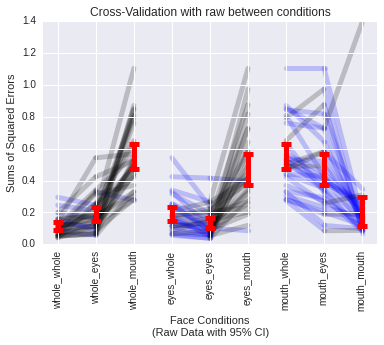

<function logistic at 0x7f6039ff7c80>


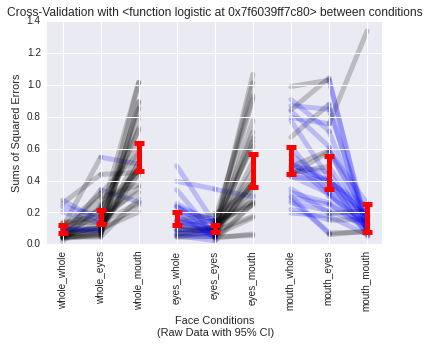

In [30]:
make_all_cv_plots(exp1RawPt1,exp1RawPt2,
                  ['whole','eyes','mouth'],
                  'exp1 cv plot')

### Inferential statistics for comparing whether each condition is best at predicting itself

In [31]:
def cv_stats(df,sig_level):
    for c1 in df.columns:
        for c2 in df.columns:
            if c1 != c2 and c1[:4] == c2[:4]:
                t,p = stats.ttest_rel(df[c1],df[c2])
                W,wp = stats.wilcoxon(df[c1],df[c2])
                if p < sig_level and wp <sig_level:
                    x = '*'
                else:
                    x = ''
                print c1,'\t',c2,x
                print 't=',t,'\tp=',p
                print 'W=',W,'\tp=',wp,'\n'

In [32]:
cv_stats(exp1_cond_cv,0.05)

eyes_eyes 	eyes_mouth *
t= -6.51402008274 	p= 5.52585567371e-07
W= 3.0 	p= 5.25641332585e-06 

eyes_eyes 	eyes_whole *
t= -3.29136837308 	p= 0.00278072637318
W= 81.0 	p= 0.00546754901291 

eyes_mouth 	eyes_eyes *
t= 6.51402008274 	p= 5.52585567371e-07
W= 3.0 	p= 5.25641332585e-06 

eyes_mouth 	eyes_whole *
t= 4.96420123919 	p= 3.35312453137e-05
W= 33.0 	p= 0.000108326671921 

eyes_whole 	eyes_eyes *
t= 3.29136837308 	p= 0.00278072637318
W= 81.0 	p= 0.00546754901291 

eyes_whole 	eyes_mouth *
t= -4.96420123919 	p= 3.35312453137e-05
W= 33.0 	p= 0.000108326671921 

mouth_eyes 	mouth_mouth *
t= 4.30152086719 	p= 0.000198496797642
W= 31.0 	p= 8.97749938226e-05 

mouth_eyes 	mouth_whole *
t= -3.23403694977 	p= 0.00321303806999
W= 66.0 	p= 0.00312593174125 

mouth_mouth 	mouth_eyes *
t= -4.30152086719 	p= 0.000198496797642
W= 31.0 	p= 8.97749938226e-05 

mouth_mouth 	mouth_whole *
t= -6.07772163451 	p= 1.72428278039e-06
W= 22.0 	p= 3.76204941685e-05 

mouth_whole 	mouth_eyes *
t= 3.2340369497

Inferential statistics for the difference of differences, comparing whether the whole face and the eyes condition are most similar to each other

In [33]:
print "\nwhole-eyes vs whole-mouth"
print "t-test\t",stats.ttest_rel( exp1_cond_cv['whole_whole']-exp1_cond_cv['whole_eyes'] ,  exp1_cond_cv['whole_whole']-exp1_cond_cv['whole_mouth'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['whole_whole']-exp1_cond_cv['whole_eyes'] ,  exp1_cond_cv['whole_whole']-exp1_cond_cv['whole_mouth'] )
print "t-test\t",stats.ttest_rel( exp1_cond_cv['whole_eyes'] -exp1_cond_cv['whole_whole'] , exp1_cond_cv['whole_eyes'] -exp1_cond_cv['whole_mouth'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['whole_eyes'] -exp1_cond_cv['whole_whole'] , exp1_cond_cv['whole_eyes'] -exp1_cond_cv['whole_mouth'] )

print "\neyes-whole vs eyes-mouth"
print "t-test\t",stats.ttest_rel( exp1_cond_cv['eyes_eyes']-exp1_cond_cv['eyes_whole'] ,  exp1_cond_cv['eyes_eyes']-exp1_cond_cv['eyes_mouth'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['eyes_eyes']-exp1_cond_cv['eyes_whole'] ,  exp1_cond_cv['eyes_eyes']-exp1_cond_cv['eyes_mouth'] )
print "t-test\t",stats.ttest_rel( exp1_cond_cv['eyes_whole'] -exp1_cond_cv['eyes_eyes'] , exp1_cond_cv['eyes_whole'] -exp1_cond_cv['eyes_mouth'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['eyes_whole'] -exp1_cond_cv['eyes_eyes'] , exp1_cond_cv['eyes_whole'] -exp1_cond_cv['eyes_mouth'] )

print "\nmouth-whole vs mouth-eyes"
print "t-test\t",stats.ttest_rel( exp1_cond_cv['mouth_mouth']-exp1_cond_cv['mouth_whole'] ,  exp1_cond_cv['mouth_mouth']-exp1_cond_cv['mouth_eyes'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['mouth_mouth']-exp1_cond_cv['mouth_whole'] ,  exp1_cond_cv['mouth_mouth']-exp1_cond_cv['mouth_eyes'] )
print "t-test\t",stats.ttest_rel( exp1_cond_cv['mouth_whole'] -exp1_cond_cv['mouth_mouth'] , exp1_cond_cv['mouth_whole'] -exp1_cond_cv['mouth_eyes'] )
print "Wilcoxon\t",stats.wilcoxon(  exp1_cond_cv['mouth_whole'] -exp1_cond_cv['mouth_mouth'] , exp1_cond_cv['mouth_whole'] -exp1_cond_cv['mouth_eyes'] )



whole-eyes vs whole-mouth
t-test	(7.5002070113631634, 4.5544760651617197e-08)
Wilcoxon	(3.0, 5.2564133258508337e-06)
t-test	(10.598208355184425, 4.023703098302902e-11)
Wilcoxon	(0.0, 3.7896194415808708e-06)

eyes-whole vs eyes-mouth
t-test	(4.9642012391914934, 3.3531245313709309e-05)
Wilcoxon	(33.0, 0.00010832667192099258)
t-test	(6.5140200827416974, 5.5258556737109939e-07)
Wilcoxon	(3.0, 5.2564133258508337e-06)

mouth-whole vs mouth-eyes
t-test	(-3.2340369497732242, 0.0032130380699925245)
Wilcoxon	(66.0, 0.0031259317412509913)
t-test	(4.3015208671945846, 0.00019849679764164657)
Wilcoxon	(31.0, 8.9774993822563996e-05)


## Experiment 2

In [34]:
def cond_cv_table2(test_df,train_df,func):
    d = {}
    for c1 in ['fearLOW','angerLOW','fearUP','angerUP']:
        for c2 in ['fearLOW','angerLOW','fearUP','angerUP']:
            d[str(c1+'_'+c2)] = cond_cv_ss2(func,test_df,train_df,c1,c2)
    return pd.DataFrame(d)

In [35]:
exp2_cond_cv = (cond_cv_table2(exp2RawPt1,exp2RawPt2,'raw') + cond_cv_table2(exp2RawPt2,exp2RawPt1,'raw'))/2.
exp2_cond_cv

,angerLOW_angerLOW,angerLOW_angerUP,angerLOW_fearLOW,angerLOW_fearUP,angerUP_angerLOW,angerUP_angerUP,angerUP_fearLOW,angerUP_fearUP,fearLOW_angerLOW,fearLOW_angerUP,fearLOW_fearLOW,fearLOW_fearUP,fearUP_angerLOW,fearUP_angerUP,fearUP_fearLOW,fearUP_fearUP
0,0.2475,0.40500,0.19750,0.52125,0.40500,0.1475,0.40750,0.41375,0.19750,0.40750,0.2625,0.43375,0.52125,0.41375,0.43375,0.1950
1,0.2825,0.52000,0.33125,0.83375,0.52000,0.2275,0.73625,1.65125,0.33125,0.73625,0.3550,0.80250,0.83375,1.65125,0.80250,0.4900
2,0.0925,1.12000,0.39875,1.06000,1.12000,0.3275,1.65875,1.00250,0.39875,1.65875,0.2800,0.85625,1.06000,1.00250,0.85625,0.7075
3,0.2200,0.36000,1.08125,0.42125,0.36000,0.0850,1.74875,0.91625,1.08125,1.74875,0.5525,0.37500,0.42125,0.91625,0.37500,0.3575
4,0.3150,2.56875,0.43625,3.12125,2.56875,0.0425,3.66250,7.53750,0.43625,3.66250,0.1875,1.99500,3.12125,7.53750,1.99500,0.1425
5,0.1300,0.53750,0.19125,0.64875,0.53750,0.1800,0.50875,0.59125,0.19125,0.50875,0.0925,0.40500,0.64875,0.59125,0.40500,0.2525
6,0.1675,1.79875,0.34625,1.39375,1.79875,0.1350,2.89500,4.29000,0.34625,2.89500,0.0750,0.81000,1.39375,4.29000,0.81000,0.1900
7,0.1800,0.59750,0.38500,0.41250,0.59750,0.1850,1.22500,0.80250,0.38500,1.22500,0.2000,0.43750,0.41250,0.80250,0.43750,0.4850
8,0.1975,0.67125,0.20625,0.46125,0.67125,0.2800,0.64500,0.74500,0.20625,0.64500,0.0600,0.39000,0.46125,0.74500,0.39000,0.1150
9,0.0925,0.90000,0.23000,1.63125,0.90000,0.3625,1.27750,2.66125,0.23000,1.27750,0.1475,1.15625,1.63125,2.66125,1.15625,0.0950


In [36]:
# remove extreme outlier for visualisation 
exp2_cond_cv_rev = pd.concat([exp2_cond_cv[:4], exp2_cond_cv[5:6], exp2_cond_cv[7:]])

['fearLOW_fearLOW', 'angerLOW_fearLOW', 'fearUP_fearLOW', 'angerUP_fearLOW', 'fearLOW_angerLOW', 'angerLOW_angerLOW', 'fearUP_angerLOW', 'angerUP_angerLOW', 'fearLOW_fearUP', 'angerLOW_fearUP', 'fearUP_fearUP', 'angerUP_fearUP', 'fearLOW_angerUP', 'angerLOW_angerUP', 'fearUP_angerUP', 'angerUP_angerUP']


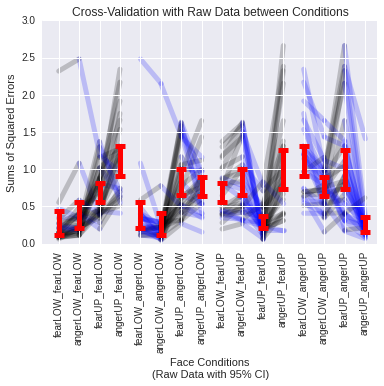

In [37]:
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# make custom condition order
cond = ['fearLOW','angerLOW','fearUP','angerUP']
all_conds = []
for c in cond:
    all_conds = all_conds + ['fearLOW_'+c,'angerLOW_'+c,'fearUP_'+c,'angerUP_'+c]
print all_conds
make_cv_lineplot(exp2_cond_cv_rev,all_conds[0:4],0)
make_cv_lineplot(exp2_cond_cv_rev,all_conds[4:8],1)
make_cv_lineplot(exp2_cond_cv_rev,all_conds[8:12],2)
make_cv_lineplot(exp2_cond_cv_rev,all_conds[12:16],3)

# customise plot
plt.xlim(-0.2,3.9)
#plt.ylim(0,2.5)
plt.xticks(arange(0,3.76,0.25),all_conds,rotation=90)
plt.title("Cross-Validation with Raw Data between Conditions")
plt.xlabel("Face Conditions\n(Raw Data with 95% CI)")
plt.ylabel("Sums of Squared Errors")
plt.savefig('Experiment2_CV_rawcond_line.png',dpi=600)
plt.show()

### Inferential Statistics Checking Whether Each Condition is Best At Predicting Itself

In [38]:
for i in [0,4,8,12]:
    print '\n'
    for c1 in exp2_cond_cv.columns[i:i+4]:
        for c2 in exp2_cond_cv.columns[i:i+4]:
            if c1.split('_')[0] == c1.split('_')[1]:
                if (exp2_cond_cv[c1] == exp2_cond_cv[c2] ).all() == False:
                   
                    t,p = stats.ttest_rel(exp2_cond_cv[c1],exp2_cond_cv[c2])
                    W,wp = stats.wilcoxon(exp2_cond_cv[c1],exp2_cond_cv[c2])
                    
                    if p < 0.01 and wp <0.01:
                        x = '*'
                    else:
                        x = ''
    
                    print c1,'\t',c2,x
                    print round(t,2),'\t',p,'\t',round(W,2),'\t',wp



angerLOW_angerLOW 	angerLOW_angerUP *
-5.43 	8.50783725631e-06 	25.0 	3.14828720478e-05
angerLOW_angerLOW 	angerLOW_fearLOW *
-3.35 	0.00234444758825 	62.0 	0.000772659290871
angerLOW_angerLOW 	angerLOW_fearUP *
-5.23 	1.47132219571e-05 	28.0 	4.17461934344e-05


angerUP_angerUP 	angerUP_angerLOW *
-5.87 	2.60551112516e-06 	12.0 	8.84792402511e-06
angerUP_angerUP 	angerUP_fearLOW *
-6.61 	3.63404503644e-07 	1.0 	2.847002324e-06
angerUP_angerUP 	angerUP_fearUP *
-3.87 	0.000592226591254 	6.0 	4.79779518445e-06


fearLOW_fearLOW 	fearLOW_angerLOW *
-4.58 	8.710747889e-05 	41.0 	0.000135360813605
fearLOW_fearLOW 	fearLOW_angerUP *
-6.03 	1.68021816462e-06 	22.0 	2.3647459451e-05
fearLOW_fearLOW 	fearLOW_fearUP *
-4.9 	3.6184762645e-05 	31.0 	5.5133311257e-05


fearUP_fearUP 	fearUP_angerLOW *
-4.96 	3.09741692117e-05 	21.0 	2.14766190022e-05
fearUP_fearUP 	fearUP_angerUP *
-3.7 	0.000938585262434 	11.0 	7.99973374173e-06
fearUP_fearUP 	fearUP_fearLOW *
-4.88 	3.81934278308e-05 	29.0 	4.